In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode

## Kohonen Self Organising Maps

In [ ]:
# 1. Load and Normalize Data
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [4]:
# 2. Initialise SOM
som_size = (7, 7) # grid size
som = MiniSom(
    x=som_size[0], y=som_size[1], 
    input_len=data.shape[1], 
    sigma=1.0,
    learning_rate=0.5, 
    random_seed=100
)

som.random_weights_init(data)

In [5]:
# 3. Train SOM
print("Training SOM...")
som.train_random(data, num_iteration=500)
print("Training Completed!")

Training SOM...
Training Completed!


In [6]:
# 4. Map Data to Winning Nodes
win_map = np.array([som.winner(x) for x in data])


In [8]:
# Convert 2D grid positions to 1D cluster IDs
cluster_ids = np.array([pos[0] * som_size[1] + pos[1] for pos in win_map])

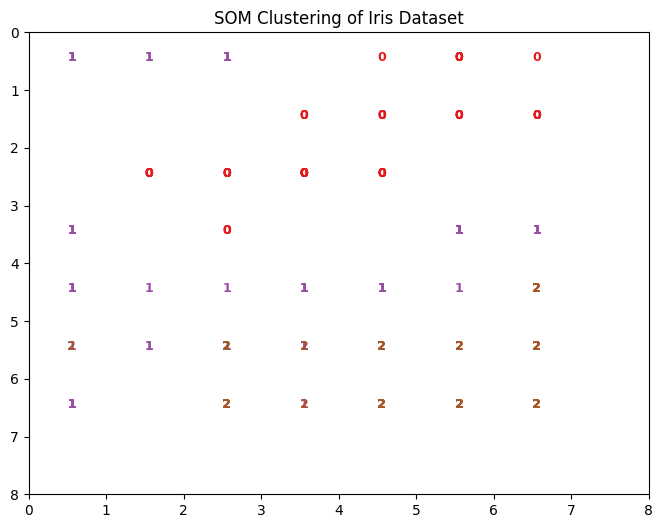

In [9]:
# 5. Visualisation
plt.figure(figsize=(8, 6))
for i, x in enumerate(data): 
    w = som.winner(x)
    plt.text(w[0] + 0.5, 
             w[1] + 0.5, 
             str(target[i]), 
             color=plt.cm.Set1(target[i]/3), 
             fontdict={'weight': 'bold', 'size':9})

plt.title("SOM Clustering of Iris Dataset")
plt.xlim([0, som_size[0] + 1])
plt.ylim([0, som_size[1] + 1])
plt.gca().invert_yaxis()
plt.show()

In [12]:
# 6. Confusion Matrix & Classification Report
# We'll align cluster IDs to true labels by majority voting
label_map = {}
for cluster_id in np.unique(cluster_ids): 
    mask = (cluster_ids == cluster_id)
    if np.any(mask): 
        label_map[cluster_id] = mode(target[mask], keepdims=True)[0][0]

predicted_labels = np.array([label_map[c] for c in cluster_ids])
print("\nConfusion Matrix: ")
print(confusion_matrix(target, predicted_labels))
print("\nClassification Report: ")
print(classification_report(target, predicted_labels, 
                            target_names=target_names))


Confusion Matrix: 
[[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]

Classification Report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.98      0.96        50
   virginica       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

